In [ ]:
# Import necessary libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet201
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model
from matplotlib import pyplot as plt

In [ ]:
# Set the path to your dataset
train_path = '/content/drive/MyDrive/DataSet/train'
valid_path = '/content/drive/MyDrive/DataSet/validation'
test_dir = '/content/drive/MyDrive/DataSet/test'

In [ ]:
# Set the image size
img_size = (224, 224)

In [ ]:
# Create the data generator and preprocess the data
train_data_gen = ImageDataGenerator(
    shear_range=0.2,  # randomly applies shear transformation to the images
    zoom_range=0.2,  # randomly zooms into the images
    horizontal_flip=True,  # randomly flips the images horizontally
    vertical_flip=True,  # randomly flips the images vertically
    rotation_range=20,  # randomly rotates the images within 20 degrees
)

valid_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

valid_data = valid_data_gen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 333 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [ ]:
# Load the DenseNet201 model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
# Add new layers on top of the DenseNet201 model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10
# Train the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=valid_data.samples // valid_data.batch_size
)

# Save the model
model.save('/content/drive/MyDrive/Trained_Models/DenseNet201.h5')

Epoch 1/10
10/10 [==============================] - 222s 19s/step - loss: 7.2839 - accuracy: 0.3754 - val_loss: 2.5676 - val_accuracy: 0.1875
Epoch 2/10
10/10 [==============================] - 103s 10s/step - loss: 2.6740 - accuracy: 0.5031 - val_loss: 2.4265 - val_accuracy: 0.2500
Epoch 3/10
10/10 [==============================] - 107s 11s/step - loss: 1.9223 - accuracy: 0.5349 - val_loss: 1.6340 - val_accuracy: 0.2500
Epoch 4/10
10/10 [==============================] - 106s 11s/step - loss: 1.2383 - accuracy: 0.6512 - val_loss: 1.6464 - val_accuracy: 0.0625
Epoch 5/10
10/10 [==============================] - 104s 11s/step - loss: 1.3147 - accuracy: 0.6080 - val_loss: 1.6423 - val_accuracy: 0.1562
Epoch 6/10
10/10 [==============================] - 100s 10s/step - loss: 0.8513 - accuracy: 0.7043 - val_loss: 1.7190 - val_accuracy: 0.0938
Epoch 7/10
10/10 [==============================] - 107s 11s/step - loss: 0.7338 - accuracy: 0.7309 - val_loss: 1.6762 - val_accuracy: 0.0625
Epoch 

In [ ]:
s = model.evaluate(train_data, verbose=0)
print("Accuracy: %.2f%%" % (s[1]*100))

Accuracy: 83.48%


In [ ]:
# Evaluate model on test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
model.evaluate(test_generator)

Found 42 images belonging to 4 classes.
2/2 [==============================] - 16s 6s/step - loss: 1.7720 - accuracy: 0.1190


[1.7719643115997314, 0.1190476194024086]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

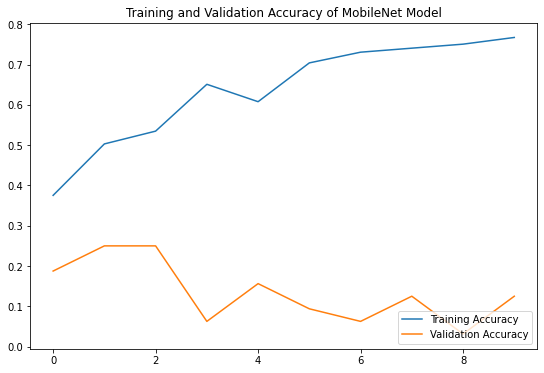

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of DenseNet201 Model')
plt.show()

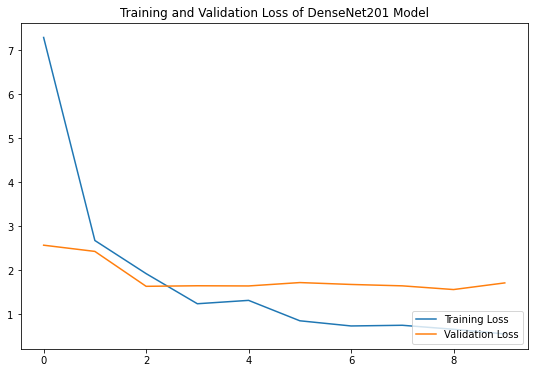

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss of DenseNet201 Model')
plt.show()